## 1. Import Required Libraries
## 2. Load Final Dataset

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/processed/final_arbitrage_dataset.csv", parse_dates=["Date"])
df.head()

,State,Market,Commodity,Date,Min_Price,Max_Price,Modal_Price,City,Retail_Price,Distance_km,Transport_rate_per_km,Transport_cost_per_kg,Price_Spread,Profit_per_kg,Profit_per_ton,Profit_per_truck,Opportunity_Score
0,Delhi,Lasalgaon,Chilli,2024-01-09,25,45,35.0,Bangalore,66,407,28,11.396,31.0,19.604,19604.0,98020.0,100.0
1,Delhi,Lasalgaon,Chilli,2024-01-09,25,45,35.0,Bangalore,66,509,19,9.671,31.0,21.329,21329.0,106645.0,100.0
2,Delhi,Lasalgaon,Chilli,2024-01-09,25,45,35.0,Bangalore,66,23,32,0.736,31.0,30.264,30264.0,151320.0,100.0
3,Delhi,Lasalgaon,Chilli,2024-01-09,25,45,35.0,Bangalore,66,55,35,1.925,31.0,29.075,29075.0,145375.0,100.0
4,Delhi,Lasalgaon,Chilli,2024-01-09,25,45,35.0,Bangalore,66,128,23,2.944,31.0,28.056,28056.0,140280.0,100.0


## 3. Basic Info

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5993 entries, 0 to 5992
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   State                  5993 non-null   object        
 1   Market                 5993 non-null   object        
 2   Commodity              5993 non-null   object        
 3   Date                   5993 non-null   datetime64[ns]
 4   Min_Price              5993 non-null   int64         
 5   Max_Price              5993 non-null   int64         
 6   Modal_Price            5993 non-null   float64       
 7   City                   5993 non-null   object        
 8   Retail_Price           5993 non-null   int64         
 9   Distance_km            5993 non-null   int64         
 10  Transport_rate_per_km  5993 non-null   int64         
 11  Transport_cost_per_kg  5993 non-null   float64       
 12  Price_Spread           5993 non-null   float64       
 13  Pro

## 4. Summary Statistics

In [21]:
df.describe()

,Date,Min_Price,Max_Price,Modal_Price,Retail_Price,Distance_km,Transport_rate_per_km,Transport_cost_per_kg,Price_Spread,Profit_per_kg,Profit_per_ton,Profit_per_truck,Opportunity_Score
count,5993,5993.000000,5993.000000,5993.000000,5993.000000,5993.000000,5993.000000,5993.000000,5993.000000,5993.000000,5993.000000,5993.000000,5993.0
mean,2024-02-08 10:16:47.975971840,16.851660,54.050392,35.451026,68.432671,749.731520,27.890372,20.844049,32.981645,12.137596,12137.595862,60687.979309,100.0
min,2024-01-02 00:00:00,5.000000,30.000000,18.000000,20.000000,23.000000,15.000000,0.465000,-27.000000,-76.358000,-76358.000000,-381790.000000,100.0
25%,2024-01-23 00:00:00,10.000000,43.000000,29.500000,45.000000,360.000000,22.000000,9.671000,10.000000,-12.266000,-12266.000000,-61330.000000,100.0
50%,2024-02-08 00:00:00,16.000000,53.000000,34.500000,67.000000,718.000000,28.000000,19.404000,29.500000,11.436000,11436.000000,57180.000000,100.0
75%,2024-02-27 00:00:00,24.000000,66.000000,41.500000,93.000000,1141.000000,34.000000,30.300000,57.500000,37.383000,37383.000000,186915.000000,100.0
max,2024-03-15 00:00:00,29.000000,79.000000,53.500000,119.000000,1498.000000,39.000000,56.628000,93.500000,89.912000,89912.000000,449560.000000,100.0
std,NaN,7.329244,13.857856,7.621976,28.494651,432.955388,7.189999,13.464692,29.523597,32.578153,32578.153431,162890.767154,0.0


## 5. Missing Values Analysis

In [22]:
df.isnull().sum()

State                    0
Market                   0
Commodity                0
Date                     0
Min_Price                0
Max_Price                0
Modal_Price              0
City                     0
Retail_Price             0
Distance_km              0
Transport_rate_per_km    0
Transport_cost_per_kg    0
Price_Spread             0
Profit_per_kg            0
Profit_per_ton           0
Profit_per_truck         0
Opportunity_Score        0
dtype: int64

## 6. Unique Categories (Commodity, Market, City)

In [23]:
df['Commodity'].unique(), df['Market'].unique(), df['City'].unique()

(array(['Chilli', 'Brinjal', 'Potato', 'Garlic', 'Onion', 'Tomato',
        'Cabbage', 'Ginger'], dtype=object),
 array(['Lasalgaon', 'Unjha', 'Jaipur', 'Azadpur', 'Pimpalgaon', 'Kolar'],
       dtype=object),
 array(['Bangalore', 'Pune', 'Jaipur', 'Mumbai', 'Delhi', 'Ahmedabad'],
       dtype=object))

In [24]:
df[['Market','City','Commodity','Profit_per_kg']].sort_values(
    by='Profit_per_kg', ascending=False
).head(10)


,Market,City,Commodity,Profit_per_kg
4654,Unjha,Ahmedabad,Garlic,89.912
1790,Kolar,Mumbai,Garlic,89.874
307,Unjha,Bangalore,Cabbage,88.864
5427,Lasalgaon,Mumbai,Cabbage,88.530
4649,Unjha,Ahmedabad,Garlic,88.316
4661,Unjha,Ahmedabad,Garlic,88.280
4653,Unjha,Ahmedabad,Garlic,87.140
3935,Pimpalgaon,Ahmedabad,Brinjal,87.035
5423,Lasalgaon,Mumbai,Cabbage,86.925
1784,Kolar,Mumbai,Garlic,86.504


## 7. Price Spread (Retail - Mandi)

In [25]:
df['Price_Spread'].describe()

count    5993.000000
mean       32.981645
std        29.523597
min       -27.000000
25%        10.000000
50%        29.500000
75%        57.500000
max        93.500000
Name: Price_Spread, dtype: float64

## 8. Top 10 Most Profitable Mandi → City Routes

In [26]:
df[['Market','City','Commodity','Profit_per_kg']].sort_values(
    by='Profit_per_kg', ascending=False
).head(10)

,Market,City,Commodity,Profit_per_kg
4654,Unjha,Ahmedabad,Garlic,89.912
1790,Kolar,Mumbai,Garlic,89.874
307,Unjha,Bangalore,Cabbage,88.864
5427,Lasalgaon,Mumbai,Cabbage,88.530
4649,Unjha,Ahmedabad,Garlic,88.316
4661,Unjha,Ahmedabad,Garlic,88.280
4653,Unjha,Ahmedabad,Garlic,87.140
3935,Pimpalgaon,Ahmedabad,Brinjal,87.035
5423,Lasalgaon,Mumbai,Cabbage,86.925
1784,Kolar,Mumbai,Garlic,86.504


## 9. Bottom 10 Least Profitable Routes

In [27]:
df[['Market','City','Commodity','Profit_per_kg']].sort_values(
    by='Profit_per_kg'
).head(10)

,Market,City,Commodity,Profit_per_kg
1417,Pimpalgaon,Mumbai,Brinjal,-76.358
1423,Pimpalgaon,Mumbai,Brinjal,-73.931
3657,Azadpur,Delhi,Brinjal,-73.019
3645,Azadpur,Delhi,Brinjal,-73.019
58,Lasalgaon,Bangalore,Chilli,-72.771
4482,Unjha,Pune,Tomato,-71.299
3652,Azadpur,Delhi,Brinjal,-70.710
3640,Azadpur,Delhi,Brinjal,-70.710
5229,Azadpur,Ahmedabad,Cabbage,-70.411
5184,Azadpur,Ahmedabad,Potato,-69.911


## 10. Profit per kg Distribution

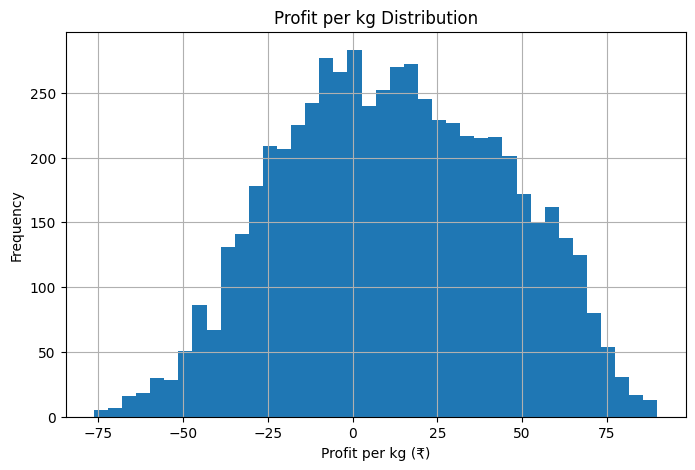

In [28]:
plt.figure(figsize=(8,5))
df['Profit_per_kg'].hist(bins=40)
plt.title("Profit per kg Distribution")
plt.xlabel("Profit per kg (₹)")
plt.ylabel("Frequency")
plt.show()

## 11. Opportunity Score Distribution

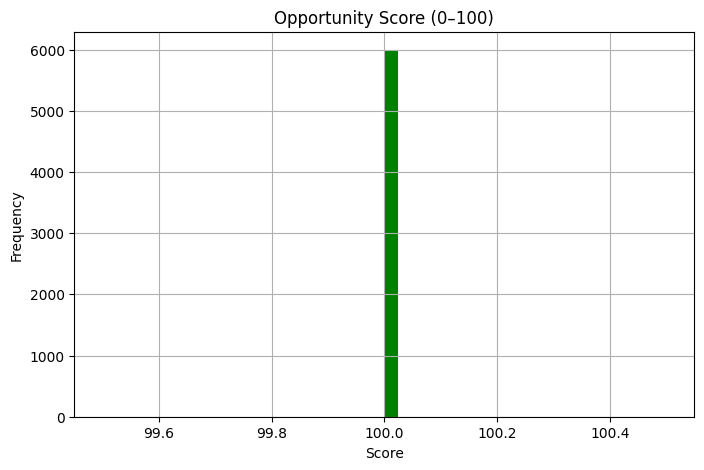

In [29]:
plt.figure(figsize=(8,5))
df['Opportunity_Score'].hist(bins=40, color="green")
plt.title("Opportunity Score (0–100)")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

## 12. Relationship: Distance vs Profit

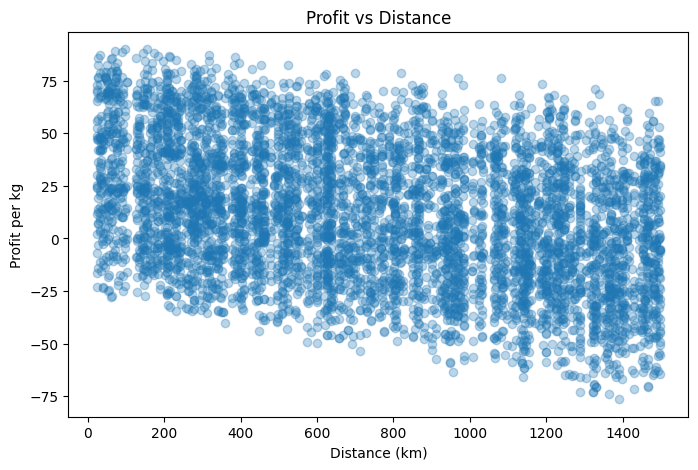

In [30]:
plt.figure(figsize=(8,5))
plt.scatter(df['Distance_km'], df['Profit_per_kg'], alpha=0.3)
plt.xlabel("Distance (km)")
plt.ylabel("Profit per kg")
plt.title("Profit vs Distance")
plt.show()

## 13. Correlation Heatmap

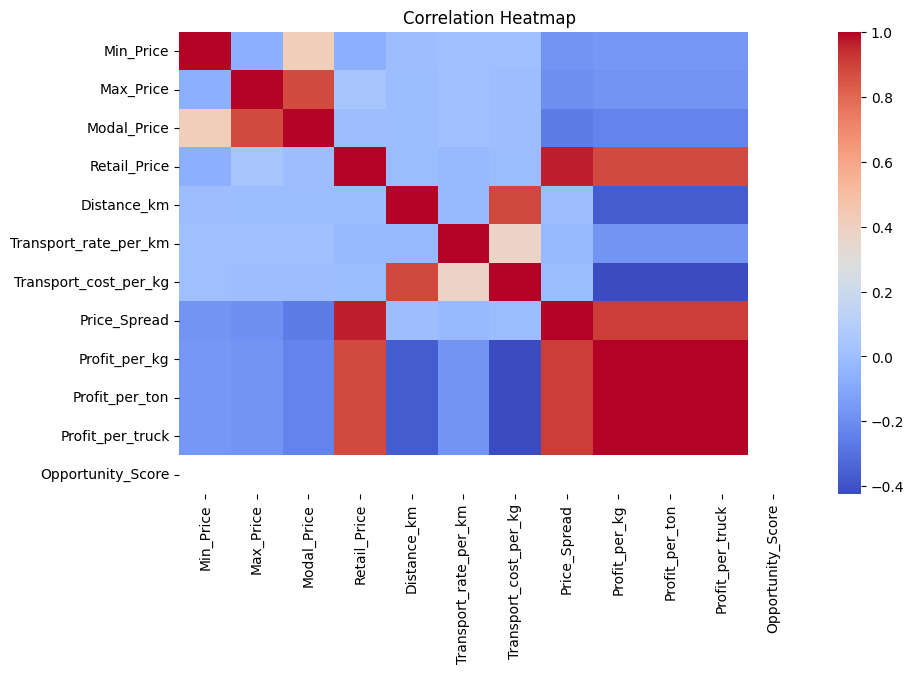

In [31]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

# 14. Key Insights Summary

### Profitability
- (You will fill these after running the notebook)

### Price Spread
- …

### Commodity Performance
- …

### Best Trading Routes
- …

### Risks & Volatility
- …

### Opportunity Score
- …
